In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
train_data = pd.read_json('/Users/liruizhi/Desktop/毕设数据处理/CHIP-CTC/CHIP-CTC_train.json')
dev_data = pd.read_json('/Users/liruizhi/Desktop/毕设数据处理/CHIP-CTC/CHIP-CTC_dev.json')
test_data = pd.read_json('/Users/liruizhi/Desktop/毕设数据处理/CHIP-CTC/CHIP-CTC_test.json')

### 数据统计

In [3]:
train_data

,id,label,text
0,s1,Therapy or Surgery,研究开始前30天内，接受过其他临床方案治疗；
1,s2,Sign,（9）严重的听力或者视力损害
2,s3,Addictive Behavior,10)现在或曾经滥用药物或酗酒，或者每天饮用相当于30毫升酒精的酒精饮料。
3,s4,Age,4.年龄小于65岁。
4,s5,Disease,⑧有精神疾病患者；
...,...,...,...
22957,s22958,Sexual related,4)既往未发生过男男同性性行为，自我报告性取向为同性或双性
22958,s22959,Sexual related,5.普通人群志愿者或处HIV感染高危状态的男男同性恋者，即最近6个月与同性发生过口交或肛交性...
22959,s22960,Sexual related,?现在和过去一年内未与非固定性伴发生无安全套的性交
22960,s22961,Sexual related,（5）试验前一月至少有一个及以上的同性伴侣；


In [4]:
dev_data

,id,label,text
0,s1,Disease,4）既往患有骨髓增生异常综合征（Myelodysplastic syndrome，MDS）...
1,s2,Disease,2.严重不可控制的感染；
2,s3,Consent,2、自主意愿参与问卷调查
3,s4,Oral related,(1)前牙结构发育不良：釉质发育不全、氟斑牙、四环素牙等；
4,s5,Disease,（2）确诊存在胃肠道器质性病变者，如炎症性肠病；
...,...,...,...
7677,s7678,Sexual related,在治疗及随访期间停止性交
7678,s7679,Sexual related,发生过男男同性性行为
7679,s7680,Sexual related,同性行为（包括：手淫、口交、肛交）
7680,s7681,Sexual related,严重的性交困难


In [4]:
train_data['label'].value_counts()

Disease                             5127
Multiple                            4556
Therapy or Surgery                  1504
Consent                             1319
Diagnostic                          1233
Laboratory Examinations             1142
Pregnancy-related Activity          1026
Age                                  917
Pharmaceutical Substance or Drug     877
Risk Assessment                      708
Allergy Intolerance                  668
Enrollment in other studies          514
Researcher Decision                  464
Compliance with Protocol             370
Organ or Tissue Status               358
Sign                                 286
Addictive Behavior                   272
Capacity                             168
Life Expectancy                      166
Symptom                              154
Neoplasm Status                      131
Device                               129
Special Patient Characteristic       104
Non-Neoplasm Disease Stage           103
Data Accessible 

In [16]:
plt_df = dev_data['label'].value_counts()

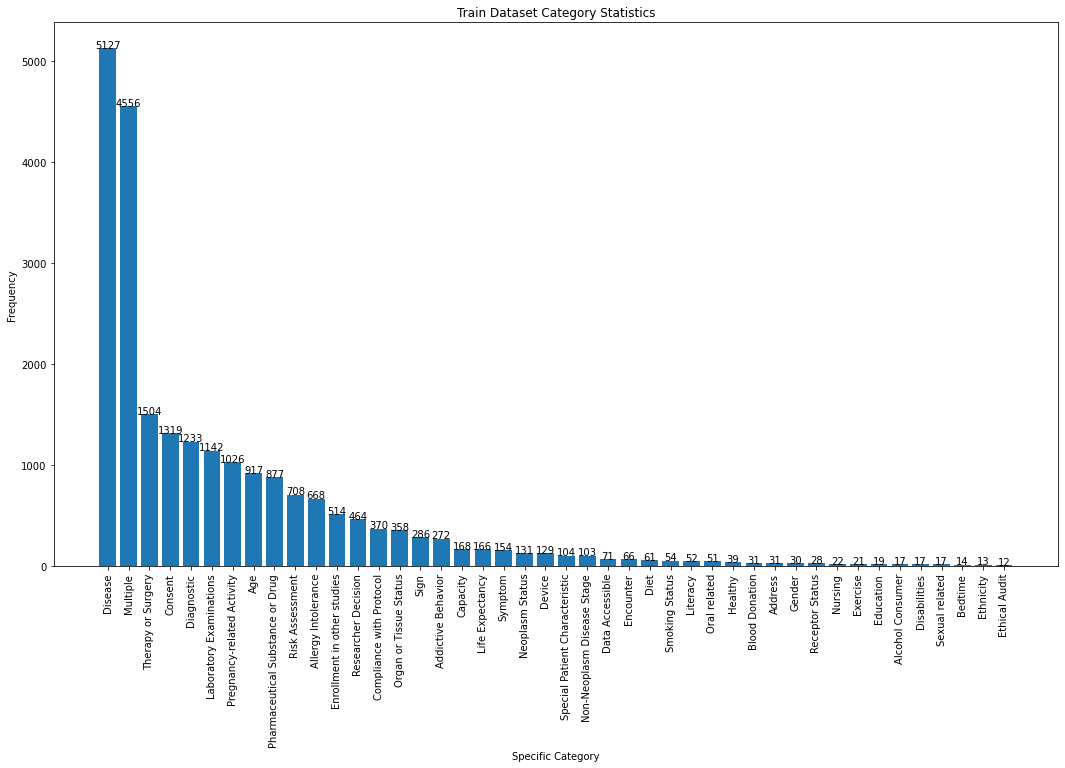

In [29]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],ha = 'center')
        
plt.xlabel('Specific Category')
plt.ylabel('Frequency')
plt.title('Train Dataset Category Statistics')        
plt.rcParams['figure.figsize'] = (20,10)
plt.xticks(rotation=90)
plt.bar(plt_df.index,plt_df.values)
addlabels(plt_df.index,plt_df.values)

In [6]:
train_data['text'].map(len).describe()

count    22962.000000
mean        27.145022
std         20.994304
min          3.000000
25%         15.000000
50%         21.000000
75%         32.000000
max        342.000000
Name: text, dtype: float64

In [3]:
np.percentile(train_data['text'].map(len), 100)

342.0

### 数据清洗

In [5]:
clean_list1 = ['(',')','（', '）','●','①','②','③','④','⑤','⑥','⑦','⑧','⑨','⑩','?','？','⑴','⑵','⑶','⑷','⑸','⑹','⑺','⑻','⑼','⑽','⑾','⑿','⒀','⒁','⒂','⒃','⒄','⒅','⒆','⒇']
clean_list2 = ['1','2','3','4','5','6','7','8','9','0',';','；','.','。',' ',',','，','、','-','—','．','i','ii','iii','iv','a','b','c','d','e','f','g','h']

for a in clean_list1:
    train_data['text'] = train_data['text'].apply(lambda x: x.replace(a,''))
    dev_data['text'] = dev_data['text'].apply(lambda x: x.replace(a,''))

for c in range(2):
    for b in clean_list2:
        train_data['text'] = train_data['text'].apply(lambda x: x.strip(b))
        dev_data['text'] = dev_data['text'].apply(lambda x: x.strip(b))

In [6]:
dev_data

,id,label,text
0,s1,Disease,既往患有骨髓增生异常综合征Myelodysplastic syndrome，MDS的患者，或...
1,s2,Disease,严重不可控制的感染
2,s3,Consent,自主意愿参与问卷调查
3,s4,Oral related,前牙结构发育不良：釉质发育不全、氟斑牙、四环素牙等
4,s5,Disease,确诊存在胃肠道器质性病变者，如炎症性肠病
...,...,...,...
7677,s7678,Sexual related,在治疗及随访期间停止性交
7678,s7679,Sexual related,发生过男男同性性行为
7679,s7680,Sexual related,同性行为包括：手淫、口交、肛交
7680,s7681,Sexual related,严重的性交困难


### 删除长度大于128的数据

In [7]:
train_data = train_data.drop(train_data[train_data['text'].map(len) > 128].index).reset_index(drop=True)
dev_data = dev_data.drop(dev_data[dev_data['text'].map(len) > 128].index).reset_index(drop=True)

In [7]:
train_data

,id,label,text
0,s1,Therapy or Surgery,研究开始前30天内，接受过其他临床方案治疗
1,s2,Sign,严重的听力或者视力损害
2,s3,Addictive Behavior,现在或曾经滥用药物或酗酒，或者每天饮用相当于30毫升酒精的酒精饮料
3,s4,Age,年龄小于65岁
4,s5,Disease,有精神疾病患者
...,...,...,...
22859,s22958,Sexual related,既往未发生过男男同性性行为，自我报告性取向为同性或双性
22860,s22959,Sexual related,普通人群志愿者或处HIV感染高危状态的男男同性恋者，即最近6个月与同性发生过口交或肛交性行为的男性
22861,s22960,Sexual related,现在和过去一年内未与非固定性伴发生无安全套的性交
22862,s22961,Sexual related,试验前一月至少有一个及以上的同性伴侣


In [8]:
dev_data

,id,label,text
0,s1,Disease,既往患有骨髓增生异常综合征Myelodysplastic syndrome，MDS的患者，或...
1,s2,Disease,严重不可控制的感染
2,s3,Consent,自主意愿参与问卷调查
3,s4,Oral related,前牙结构发育不良：釉质发育不全、氟斑牙、四环素牙等
4,s5,Disease,确诊存在胃肠道器质性病变者，如炎症性肠病
...,...,...,...
7642,s7678,Sexual related,在治疗及随访期间停止性交
7643,s7679,Sexual related,发生过男男同性性行为
7644,s7680,Sexual related,同性行为包括：手淫、口交、肛交
7645,s7681,Sexual related,严重的性交困难


In [8]:
train_data.loc[train_data['id'] == 's2006']  

,id,label,text
1995,s2006,Risk Assessment,根据ECOG评分标准注1，体力状况级别为0-2级


In [9]:
dev_data.loc[dev_data['id'] == 's2006']  

,id,label,text
1993,s2006,Diagnostic,符合急性冠脉综合征包括不稳定型心绞痛和非ST抬高型心肌梗死诊断


In [9]:
train_data.to_csv('train_clean.csv', index=None, header=None)

In [10]:
dev_data.to_csv('dev_clean.csv', index=None, header=None)